## Classification Algorithms (K-NN, Bayes Classifier and SVM)

          0.5    0.6        0.7         0.8    0.9
3   98.648649   96.0  89.583333   95.238095  100.0
5   95.945946   96.0  93.750000  100.000000  100.0
7   97.297297   98.0  91.666667  100.000000  100.0
9   95.945946   98.0  93.750000   95.238095  100.0
11  94.594595  100.0  89.583333   95.238095  100.0


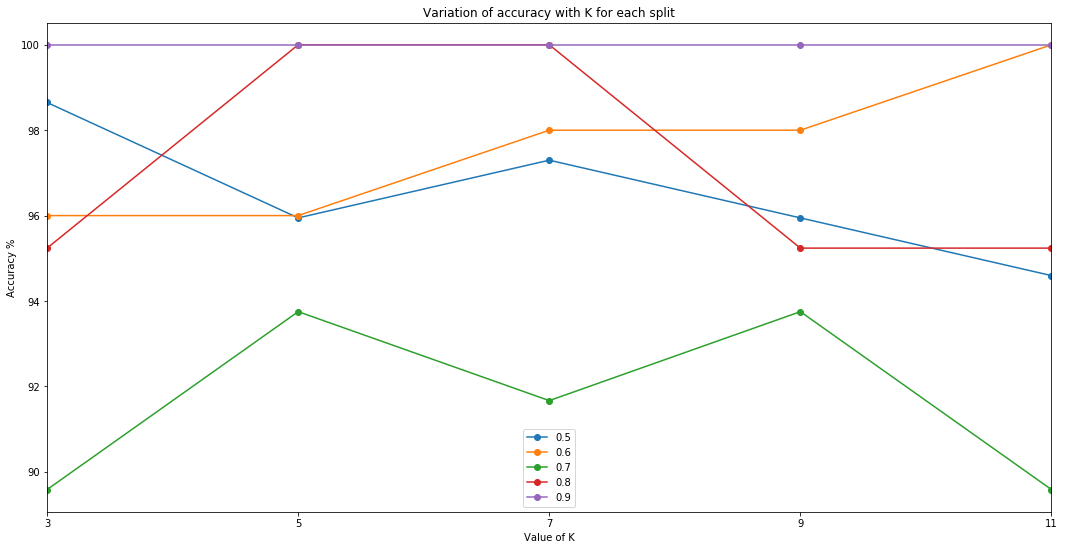

In [2]:
import csv
import random
import math
import operator
import pandas as pd
import matplotlib.pyplot as plt

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def main():
    acc_k_split={}
    # prepare data
    split=[0.5,0.6,0.7,0.8,0.9]
    k=[3,5,7,9,11]
    # generate predictions
    for i in range(0,len(split)):
        trainingSet=[]
        testSet=[]
        acc=[]
        loadDataset(r'.\iris.csv', split[i], trainingSet, testSet)
        for j in range(0,len(k)):
            predictions=[]
            for x in range(len(testSet)):
                neighbors = getNeighbors(trainingSet, testSet[x], k[j])
                result = getResponse(neighbors)
                predictions.append(result)
                #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
            accuracy = getAccuracy(testSet, predictions)
            acc.append(accuracy)
           #print ('split=', split[i], "k=",k[j],'Accuracy:',str(accuracy),'%' )
        acc_k_split[split[i]] =acc   
    #Creating DataFrame out of dictionary
    acc_k_df = pd.DataFrame(acc_k_split, index=k)
    print(acc_k_df)
    #Creating graph
    acc_k_df.plot(xticks=k,marker='o',figsize=(18,9))
    plt.xlabel('Value of K')
    plt.ylabel('Accuracy %')
    plt.title('Variation of accuracy with K for each split')
main()

In [168]:
'''
split=[0.5,0.6,0.7,0.8,0.9]
k=[3,5,7,9,11]
accuracy=[92.77,95.1,95.18,93.97,91.56]
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=200,figsize=(10,5))
#ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')
ax.scatter3D(k,accuracy,split,color='r')
ax.plot3D(k,accuracy,split, 'black')
#ax.contour3D(k,accuracy,split, cmap='red')
ax.set_xlabel('value of k')
ax.set_ylabel('accuraccy %')
ax.set_zlabel('split')
'''

"\nsplit=[0.5,0.6,0.7,0.8,0.9]\nk=[3,5,7,9,11]\naccuracy=[92.77,95.1,95.18,93.97,91.56]\nimport matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D\nfig = plt.figure(dpi=200,figsize=(10,5))\n#ax = fig.add_subplot(111, projection='3d')\nax = plt.axes(projection='3d')\nax.scatter3D(k,accuracy,split,color='r')\nax.plot3D(k,accuracy,split, 'black')\n#ax.contour3D(k,accuracy,split, cmap='red')\nax.set_xlabel('value of k')\nax.set_ylabel('accuraccy %')\nax.set_zlabel('split')\n"

In [794]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split

path = r'.\iris.csv'
df_iris = pd.read_csv(path)
print(df_iris)
y  = df_iris.iloc[:,-1]
X = df_iris.iloc[:,:-1]

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
5x CV Accuracy kNNs: 0.97
[0.96666667 1.         0.93333333 0.96666667 1.        ]
5x CV Accuracy kNNs: 0.97
[0.96666667 1.         0.96666667 0.96666667 1.        ]
5x CV Accuracy kNNs: 0.98
[0.96666667 1.         0.96666667 0.93333333 1.        ]
5x CV Accuracy kNNs: 0.97
[0.93333333 1.         1.         0.96666667 1.        ]
5x CV Accuracy kNNs: 0.98


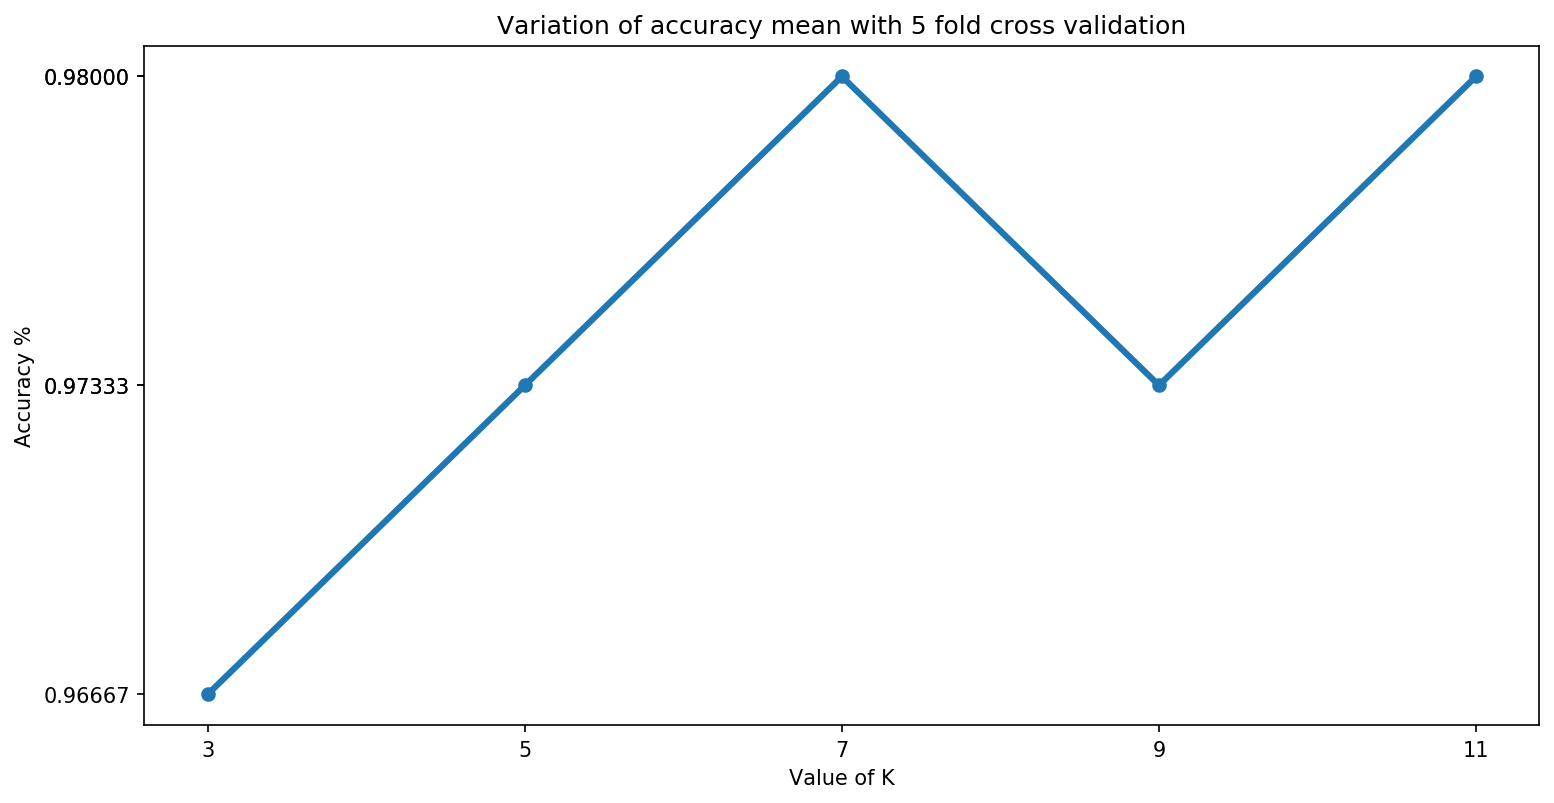

In [795]:
accuracy_mean=[]
k_values=[3,5,7,9,11]
for kNN_k in k_values:
    kNN = KNeighborsClassifier(n_neighbors=kNN_k)
    kNN_scores = cross_val_score(kNN, X, y, cv=5)
    print(kNN_scores)
    accuracy_mean.append(kNN_scores.mean())
    print("5x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean())) 
    #y_pred = cross_val_predict(kNN, X, y, cv=5)
plt.figure(figsize = (12,6), dpi=150)
plt.plot(k_values,accuracy_mean,marker='o',lw=3)
plt.xticks(k_values)
plt.yticks(accuracy_mean)
plt.xlabel('Value of K')
plt.ylabel('Accuracy %')
plt.title('Variation of accuracy mean with 5 fold cross validation')
plt.show()

In [805]:
import nltk
from nltk.corpus import names
import random

def gender_features(word):
    return {'Combination of Second last and last two letter': word[-2:]+word[-2]}
# gender_features('Shrek') = {'last_letter': 'k'}

male_names = [(name, 'male') for name in names.words('male.txt')]
female_names = [(name, 'female') for name in names.words('female.txt')]
labeled_names = male_names + female_names
random.shuffle(labeled_names)
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
#entries are    ({'last_letter': 'g'}, 'male')
train_set, test_set = featuresets[500:], featuresets[:500]

classifier = nltk.NaiveBayesClassifier.train(train_set)

name1='abhishek'
name2= 'Karishma'
ans1 = classifier.classify(gender_features(name1))
ans2 = classifier.classify(gender_features(name2))

print(name1,"is:", ans1)
print(name2,"is:", ans2)

classifier.show_most_informative_features(5)
acc = nltk.classify.accuracy(classifier, test_set)
print("Accuracy is :",acc)

abhishek is: male
Karishma is: female
Most Informative Features
Combination of Second last and last two letter = 'nan'          female : male   =    169.4 : 1.0
Combination of Second last and last two letter = 'lal'          female : male   =     73.4 : 1.0
Combination of Second last and last two letter = 'ldl'            male : female =     40.6 : 1.0
Combination of Second last and last two letter = 'iai'          female : male   =     39.5 : 1.0
Combination of Second last and last two letter = 'rar'          female : male   =     37.1 : 1.0
Accuracy is : 0.806


In [784]:
import nltk
from nltk.corpus import names
import random

def gender_features(word):
    return {'last_letter': word[-1]}
# gender_features('Shrek') = {'last_letter': 'k'}

male_names = [(name, 'male') for name in names.words('male.txt')]
female_names = [(name, 'female') for name in names.words('female.txt')]
labeled_names = male_names + female_names
random.shuffle(labeled_names)
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
#entries are    ({'last_letter': 'g'}, 'male')
train_set, test_set = featuresets[500:], featuresets[:500]

classifier = nltk.NaiveBayesClassifier.train(train_set)

name1='abhishek'
name2= 'Karishma'
ans1 = classifier.classify(gender_features(name1))
ans2 = classifier.classify(gender_features(name2))

print(name1,"is:", ans1)
print(name2,"is:", ans2)

acc2 = nltk.classify.accuracy(classifier, test_set)
print("Accuracy is :",acc2)

abhishek is: male
Karishma is: female
Accuracy is : 0.764


Text(0, 0.5, 'Accuracy')

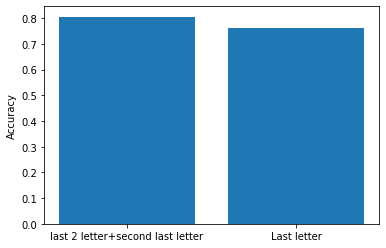

In [808]:

plt.bar(['last 2 letter+second last letter','Last letter'],height=[acc,acc2])
plt.ylabel('Accuracy')

### SVM

GAMMA= 50 C= 0.5
Prediction: [3]


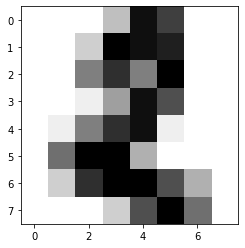

Prediction: [3]


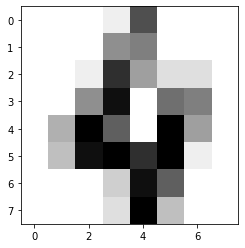

Prediction: [3]


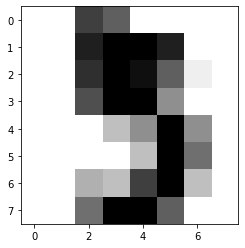

Prediction: [3]


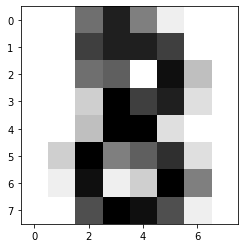

Prediction: [3]


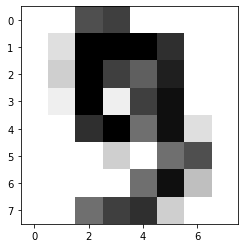

GAMMA= 5 C= 100
Prediction: [2]


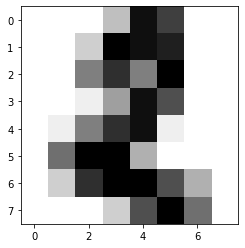

Prediction: [4]


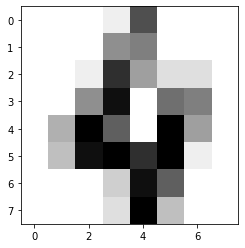

Prediction: [5]


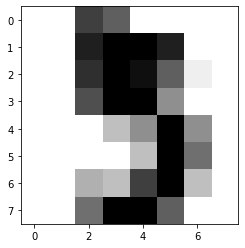

Prediction: [8]


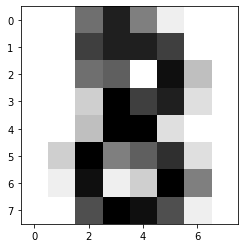

Prediction: [9]


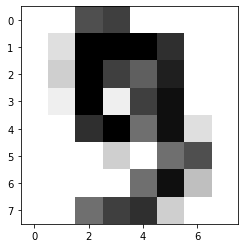

GAMMA= 0.005 C= 1000
Prediction: [2]


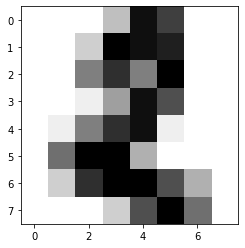

Prediction: [4]


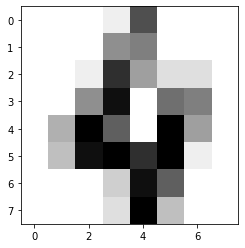

Prediction: [5]


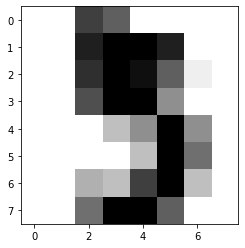

Prediction: [8]


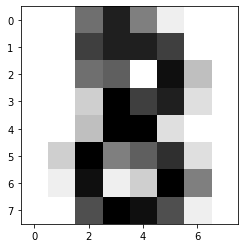

Prediction: [9]


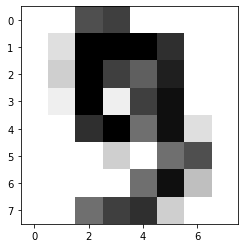

In [785]:
__author__ = 'user'
# http://pythonprogramming.net/support-vector-machine-svm-example-tutorial-scikit-learn-python/

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import svm

C=[0.5,100,1000]
gamma=[50,5,0.005]
d=[2,4,5,8,9]
digits = datasets.load_digits()
X, y = digits.data[:-1], digits.target[:-1]
for i in range(0,3):
    print("GAMMA=",gamma[i],"C=",C[i])
    classifier = svm.SVC(gamma=gamma[i], C=C[i])
    classifier.fit(X, y)
    print("======================================================")
    for j in range(0,5):
        print('Prediction:', classifier.predict(digits.data[d[j]].reshape(1,-1)))
        plt.imshow(digits.images[d[j]], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()

In [755]:
digits.data[digits[j]]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])